In [1]:
# import libraries

import praw # Reddit's Python Reddit API Wrapper

import numpy as np # NumPy, for numbers
import pandas as pd # Pandas, for Panel Data

from datetime import datetime as dt # Datetime, because dates

import matplotlib.pyplot as plt # Plotting some graphs
import seaborn as sns # Plotting some slightly prettier graphs

# Inline magic, so that plots will show up in the notebook
%matplotlib inline

In [2]:
# all of of the O2Auth stuff -- you'll need to set up a reddit app:
# https://www.reddit.com/prefs/apps/

id_key = ''
secret_key = ''
app_name =  ''

user_name = ''
p_dubs = ''

In [3]:
# instantiate reddit
reddit = praw.Reddit(client_id = id_key,
                     client_secret = secret_key,
                     user_agent = app_name,
                     username = user_name,
                     password = p_dubs
                    )

In [4]:
# grab the subreddit
subreddit = 'AskReddit'
sr = reddit.subreddit(display_name = subreddit)

In [5]:
# get the top 1000
sr_top = sr.top(limit = 1000) # limit is 1000 -- won't return any more than that

In [6]:
# iterate through top threads
col_names = ['id', 'url', 'title', 'score', 'comments', 'created', 'text']

threads = {'id':[],
           'url':[],
           'title':[],
           'score':[],
           'comments':[],
           'created':[],
           'text':[]
          }

for post in sr_top:
    threads['title'].append(post.title)
    threads['score'].append(post.score)
    threads['id'].append(post.id)
    threads['url'].append(post.url)
    threads['comments'].append(post.num_comments)
    threads['created'].append(post.created)
    threads['text'].append(post.selftext)
    
threads_df = pd.DataFrame(threads)

In [7]:
threads_df.head()

,id,url,title,score,comments,created,text
0,80phz7,https://www.reddit.com/r/AskReddit/comments/80...,With all of the negative headlines dominating ...,139493,21679,1.519790e+09,
1,99eh6b,https://www.reddit.com/r/AskReddit/comments/99...,"Without saying what the category is, what are ...",130736,26274,1.534982e+09,
2,70k2ya,https://www.reddit.com/r/AskReddit/comments/70...,How would you feel about a law that requires p...,124617,10715,1.505632e+09,
3,84anfy,https://www.reddit.com/r/AskReddit/comments/84...,Professor Stephen Hawking has passed away at t...,116991,2811,1.521030e+09,We have lost one of the greatest minds in hist...
4,8pks1u,https://www.reddit.com/r/AskReddit/comments/8p...,Suicide Prevention Megathread,102904,16819,1.528500e+09,With the news today of the passing of the amaz...


In [8]:
threads_df['timestamp'] = threads_df['created'].apply(dt.fromtimestamp)
threads_df['date'] = threads_df['timestamp'].dt.date
threads_df['hour'] = threads_df['timestamp'].dt.hour
threads_df['dow'] = threads_df['timestamp'].dt.dayofweek

In [9]:
dow = {0:'Monday',
       1:'Tuesday',
       2:'Wednesday',
       3:'Thursday',
       4:'Friday',
       5:'Saturday',
       6:'Sunday'
      }

threads_df['dayname'] = threads_df['dow'].apply(lambda x: dow[x])

In [10]:
threads_df.head()

,id,url,title,score,comments,created,text,timestamp,date,hour,dow,dayname
0,80phz7,https://www.reddit.com/r/AskReddit/comments/80...,With all of the negative headlines dominating ...,139493,21679,1.519790e+09,,2018-02-27 21:53:47,2018-02-27,21,1,Tuesday
1,99eh6b,https://www.reddit.com/r/AskReddit/comments/99...,"Without saying what the category is, what are ...",130736,26274,1.534982e+09,,2018-08-22 18:50:56,2018-08-22,18,2,Wednesday
2,70k2ya,https://www.reddit.com/r/AskReddit/comments/70...,How would you feel about a law that requires p...,124617,10715,1.505632e+09,,2017-09-17 02:12:16,2017-09-17,2,6,Sunday
3,84anfy,https://www.reddit.com/r/AskReddit/comments/84...,Professor Stephen Hawking has passed away at t...,116991,2811,1.521030e+09,We have lost one of the greatest minds in hist...,2018-03-14 07:26:14,2018-03-14,7,2,Wednesday
4,8pks1u,https://www.reddit.com/r/AskReddit/comments/8p...,Suicide Prevention Megathread,102904,16819,1.528500e+09,With the news today of the passing of the amaz...,2018-06-08 18:25:01,2018-06-08,18,4,Friday


In [11]:
threads_df['dayname'].value_counts()

Monday       160
Wednesday    155
Thursday     148
Tuesday      139
Friday       135
Sunday       133
Saturday     121
Name: dayname, dtype: int64

In [12]:
day_hour = threads_df[['hour','dow', 'dayname','title']].pivot_table(aggfunc = 'count', index = ['dow', 'dayname'], columns = 'hour')
day_hour

title                                               ...         \
hour             0     1    2    3    4    5    6    7    8    9  ...     14   
dow dayname                                                       ...          
0   Monday      7.0  10.0  3.0  6.0  2.0  6.0  2.0  2.0  NaN  NaN ...   12.0   
1   Tuesday     9.0   1.0  2.0  4.0  5.0  2.0  5.0  1.0  5.0  NaN ...    8.0   
2   Wednesday   5.0   6.0  3.0  1.0  7.0  3.0  6.0  2.0  6.0  2.0 ...   19.0   
3   Thursday    6.0   6.0  8.0  5.0  4.0  6.0  5.0  2.0  2.0  2.0 ...   10.0   
4   Friday      4.0   3.0  3.0  3.0  6.0  5.0  2.0  1.0  NaN  2.0 ...    9.0   
5   Saturday    3.0   6.0  2.0  5.0  3.0  2.0  NaN  2.0  2.0  1.0 ...   11.0   
6   Sunday      NaN   6.0  4.0  5.0  4.0  6.0  1.0  5.0  2.0  3.0 ...   10.0   

                                                                
hour             15    16    17    18   19   20   21   22   23  
dow dayname                                                     
0   Monday     13.0  15.0   8.0   9.0  3.0  7.0  8.0  8.0  7.0  
1   Tuesday    11.0  12.0   6.0  11.0  3.0  4.0  7.0  6.0  3.0  
2   Wednesday  14.0   9.0   7.0  10.0  6.0  8.0  2.0  5.0  8.0  
3   Thursday   17.0   8.0   7.0  11.0  5.0  3.0  5.0  5.0  5.0  
4   Friday     11.0  11.0  11.0  11.0  9.0  5.0  6.0  4.0  3.0  
5   Saturday   14.0  11.0  10.0  10.0  2.0  NaN  9.0  1.0  7.0  
6   Sunday     16.0   8.0   9.0  12.0  6.0  3.0  5.0  5.0  9.0  

[7 rows x 24 columns]

Text(177,0.5,'Day of Week')

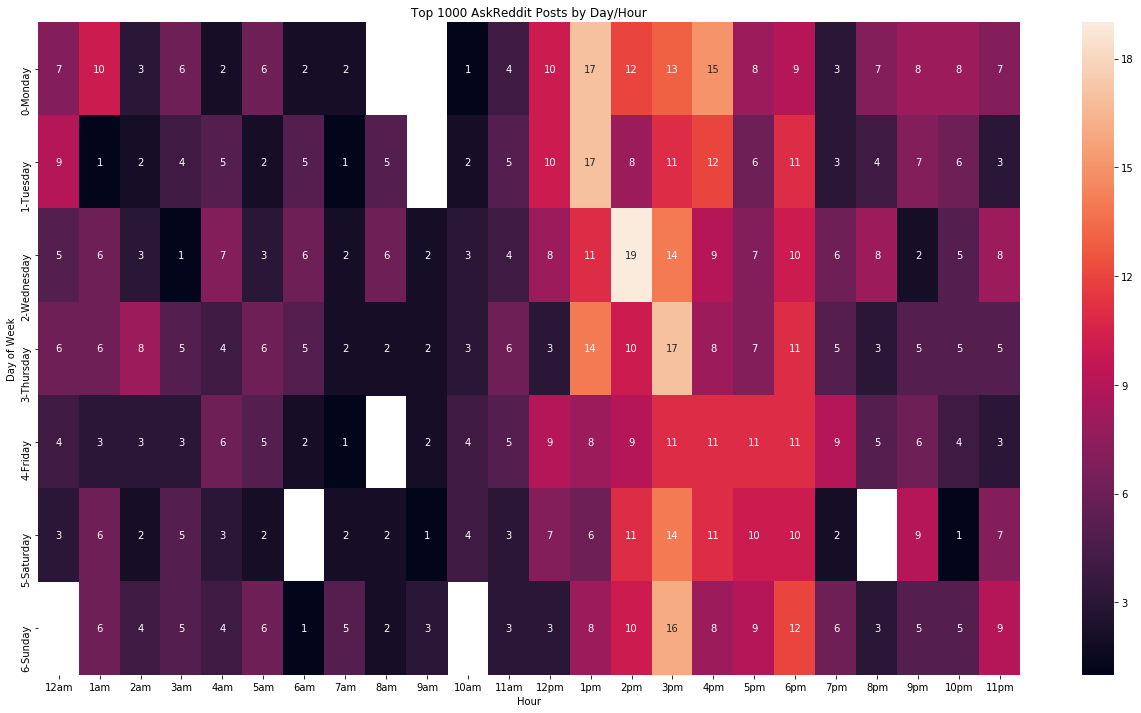

In [13]:
# let's visualize the best time to post on the subreddit

plt.figure(figsize = (22, 12))
xlabs = ['12am', '1am', '2am', '3am', '4am', '5am', 
         '6am', '7am', '8am', '9am', '10am', '11am', 
         '12pm', '1pm', '2pm', '3pm', '4pm', '5pm',
         '6pm', '7pm', '8pm', '9pm', '10pm', '11pm'        
        ]
sns.heatmap(day_hour, annot = True, xticklabels = xlabs)

plt.title('Top 1000 {} Posts by Day/Hour'.format(subreddit))
plt.xlabel('Hour')
plt.ylabel('Day of Week')

In [14]:
# Assemble a dictionary of words and their followers, pt. 1

def make_pairs(series, by_thread = False):  
    """
    by_thread == False:
        Lumps all the threads together into one big corpus, then splits it apart by word -- a lot fewer dead ends (and more word variety)

    by_thread == True
        Splits the text by thread title, and leads to a lot of dead-ends
        (because the last word of a thread probably doesn't correspond with a mid-sentence word, so it has no followers.)
    """ 

    for title in range(len(series) - 1):
        t_list = series[title].split()
        
        if by_thread:
            for word in range(len(t_list) - 1):
                yield (t_list[word], t_list[word + 1]) # yield returns a generator; if this corpus were bigger it'd be good for memory
        
        else:
            corpus = []
            
            for word in t_list:
                corpus.append(word)
                
            for word_num in range(len(corpus) - 1):
                yield (corpus[word_num], corpus[word_num + 1])

In [15]:
# Assemble a dictionary of words and their followers, pt. 2

pairs = make_pairs(threads_df['title'])

word_dict = {}

for word_1, word_2 in pairs:
    if word_1 in word_dict.keys():
        word_dict[word_1].append(word_2)
    else:
        word_dict[word_1] = [word_2]

In [16]:
# Markov-ish chain to simulate thread titles

results = []

# Loop through and create 10 phrases
for loops in range(1, 11):
    first_word = np.random.choice(list(word_dict.keys()))

    # Start off with a capitalized word, like a real sentence
    while first_word.islower():
        first_word = np.random.choice(list(word_dict.keys()))
        
    # If you want to ensure that a thread starts with a certain word/phrase...
    #first_word = "TIL:"

    chain = [first_word]

    min_words = 5 #np.random.randint(low = 5, high = 19)
    max_words = 30
    stop_punc = '!.?'

    i = 1
    while ((i < min_words) or (second_word[-1] not in stop_punc)) and (i < max_words):
        try:
            # If a word has no word following it, you get an error; it's the last word of a thread title, 
            # So either start with a new random word or just stop altogether
            second_word = np.random.choice(word_dict[chain[-1]])
            
        except:
            i = max_words
            #second_word = np.random.choice(list(word_dict.keys()))
            #
            #while second_word.islower():
            #    second_word = np.random.choice(list(word_dict.keys()))
        
        # If you look at r/TIL threads and you lump the threads into a single corpus, you end up with "TIL" sprinkled into the new phrase
        # this little block fixes that
        while second_word in ["TIL", "TIL:"]:
            chain = chain[0:-1]
            
            try:
                second_word = np.random.choice(word_dict[chain[-1]])
            except:
                second_word = np.random.choice(list(word_dict.keys()))

                while second_word.islower():
                    second_word = np.random.choice(list(word_dict.keys()))
        
        chain.append(second_word)
        i = i + 1

    results.append(' '.join(chain))
    
results

['Cold War, how bad trait of absolute silence and how did your life now?" now?"',
 'Owners Association horror stories? stories?',
 '14 years old country, what is your "I hated that made you are married to have you ever watched a moth who didn\'t know of?',
 'Fear Factor, what do the most excited to a prosperous nation so far?',
 "Employees of Reddit, what's your least a reason you still unexplored because people often brag about?",
 'Japan perceived by going off your life?',
 "Who deserves the game, what is the funniest insult you the single shoe on a child that it's funny?",
 'Valentines Day? Day?',
 'Drug dealers of Reddit, what\'s your throat and how did your go-to "deep discussion" question should do you realize someone says "Tell me think buzzfeed employees worked on 9/11, what',
 'George Constanza-esque reason the worst change your lives easier?']